In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
bias = 100
x, y, coef = make_regression(100, n_features=1, n_informative=1, bias=bias, coef=True, noise=10)

In [4]:
expected_theta = np.hstack([[bias], coef])

In [5]:
class CustomLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, x, y):
        self.x = np.hstack([np.ones((x.shape[0], 1)), x])
        self.y = y.reshape(-1, 1)
        
        first = np.linalg.pinv(np.dot(self.x.T, self.x))
        second = np.dot(self.x.T, self.y)
        
        self.theta = np.dot(first, second)
        
        
    def hypothesis(self, x, theta):
        return np.dot(x, theta)
    
    def predict(self, x):
        x = np.hstack([np.ones((x.shape[0], 1)), x])
        return self.hypothesis(x, self.theta).flatten()

In [6]:
model = CustomLinearRegression()

In [7]:
model.fit(x , y)

In [8]:
yh = model.predict(x)

In [9]:
print(y[:10])
print(yh[:10])


[ 152.07327372   42.2606495   162.20339693  138.59252936   35.67988944
   39.22394999  188.6160717    85.93746119 -150.00836543  128.87777874]
[ 140.9556553    42.8114789   176.49641574  145.35963745   40.57536819
   30.77805941  185.9651339    97.48409393 -133.38012377  117.29809692]


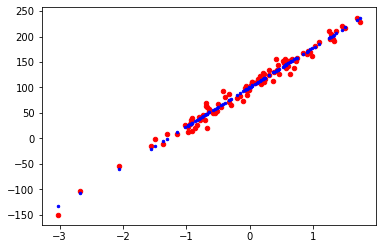

In [10]:
plt.scatter(x[ : ,0] , y, color="red", s=20)
plt.scatter(x[ : , 0], yh, color="blue", s=6)

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [12]:
X, y = load_boston(return_X_y=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [14]:
model = CustomLinearRegression()

In [15]:
model.fit(X_train, y_train)


In [16]:
model.theta

array([[ 3.33349758e+01],
       [-1.28749718e-01],
       [ 3.78232228e-02],
       [ 5.82109233e-02],
       [ 3.23866812e+00],
       [-1.61698120e+01],
       [ 3.90205116e+00],
       [-1.28507825e-02],
       [-1.42222430e+00],
       [ 2.34853915e-01],
       [-8.21331947e-03],
       [-9.28722459e-01],
       [ 1.17695921e-02],
       [-5.47566338e-01]])

In [17]:
a1 = model.predict(X_test[:20])

In [18]:
y_test[:20]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
m1 = LinearRegression()

In [21]:
m1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
a2 = m1.predict(X_test[:20])

In [23]:
sum((y_test[:20] - a1)**2)


432.67117322816057

In [24]:
sum((y_test[:20] - a2)**2)

432.67117322801556

## Closed Form Solution in Linear Regression  (online Lec)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [26]:
# Generate Dataset
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)


Y = Y.reshape((-1,1))
print(X.shape)
print(Y.shape)

(400, 1)
(400, 1)


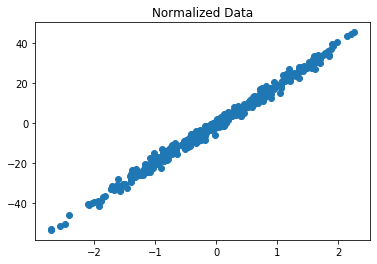

In [27]:
# Normalize
X = (X-X.mean())/X.std()

# Visualize
plt.figure()
plt.scatter(X,Y)
plt.title("Normalized Data")
plt.show()

In [28]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [29]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [30]:
theta = getThetaClosedForm(X_,Y)
print(theta)


[[19.45877082]
 [-0.29187892]]


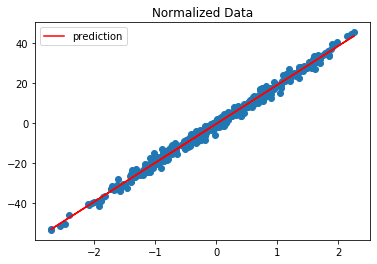

In [31]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='red',label="prediction")
plt.title("Normalized Data")
plt.legend()
plt.show()